## K-means Clustering

### What is K-means clustering?
- K-means is an **unsupervised machine learning algorithm** used to **group similar data points into clusters**.  
- The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
- It accomplishes this using a simple conception of what the optimal clustering looks like:
    - The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    - Each point is closer to its own cluster center than to other cluster centers.

### How the K-means algorithm works:
- **Initialization**: The algorithm begins by randomly selecting 'K' data points from the dataset to serve as initial cluster centroids.

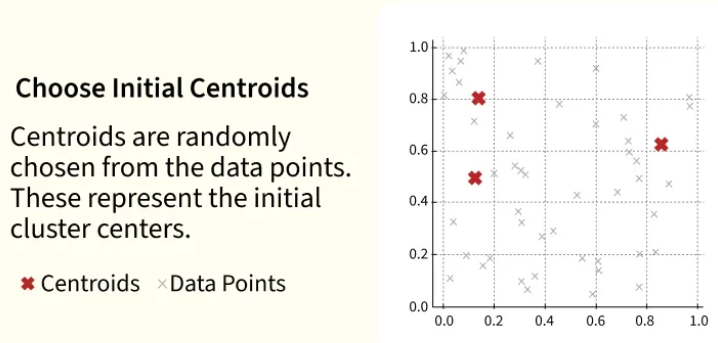

- **Assignment**: Each data point in the dataset is assigned to the nearest centroid based on a chosen distance metric (commonly Euclidean distance). This forms 'K' initial clusters.
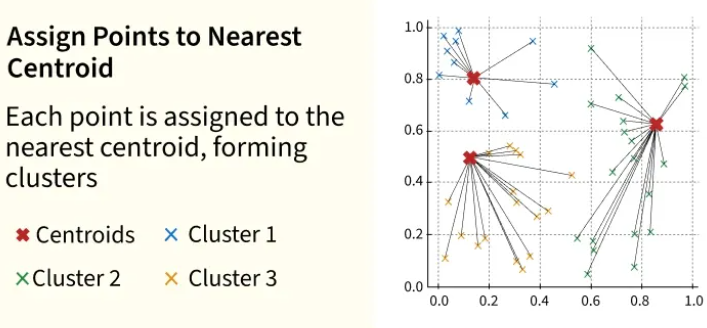

- **Update**: The centroids of each cluster are then recalculated by taking the mean of all data points assigned to that cluster. This new mean becomes the updated centroid.
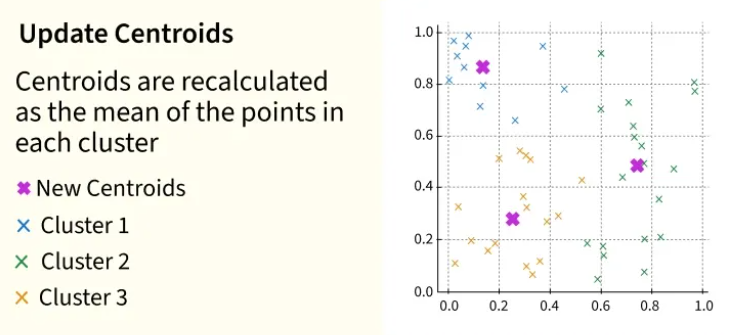

- **Iteration**: Steps 2 and 3 are repeated iteratively. Data points are reassigned to the nearest new centroid, and centroids are recalculated. This process continues until the cluster assignments no longer change significantly, indicating convergence, or a pre-defined number of iterations is reached.
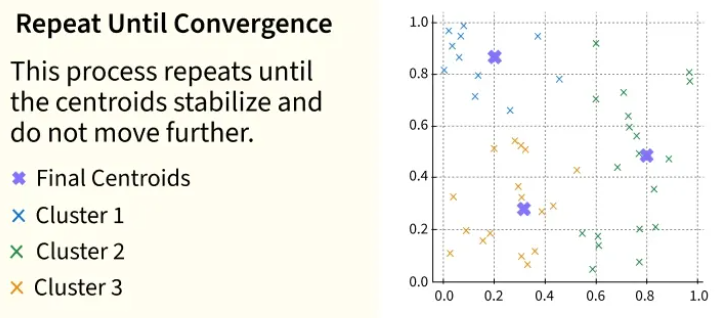

### Key characteristics of K-means:
- Unsupervised Learning: It does not require labeled data for training, making it suitable for exploring data and discovering hidden patterns.
- Centroid-based: Clusters are defined by their centroids, which represent the center of each cluster.
- Hard Clustering: Each data point belongs exclusively to one cluster.
- Requires 'K' as input: The number of clusters, 'K', must be specified beforehand, often determined using methods like the elbow method.
- Iterative: The algorithm refines cluster assignments and centroid positions through repeated steps.

### Applications:
K-means clustering finds applications in various domains, including:
- Customer Segmentation: Grouping customers with similar purchasing behaviors or demographics.
- Image Compression/Segmentation: Reducing image size or identifying distinct regions within an image.
- Document Clustering: Grouping similar documents based on their content.
- Anomaly Detection: Identifying outliers or unusual data points that do not fit into any established cluster.

### Implementation of K-Means Clustering
We will be using blobs datasets and show how clusters are made using Python programming language.

#### Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#### Creating Custom Dataset

We will generate a synthetic dataset with make_blobs.

- `make_blobs(n_samples=500, n_features=2, centers=3)`: Generates 500 data points in a 2D space, grouped into 3 clusters.
- `plt.scatter(X[:, 0], X[:, 1])`: Plots the dataset in 2D, showing all the points.
- `plt.show()`: Displays the plot

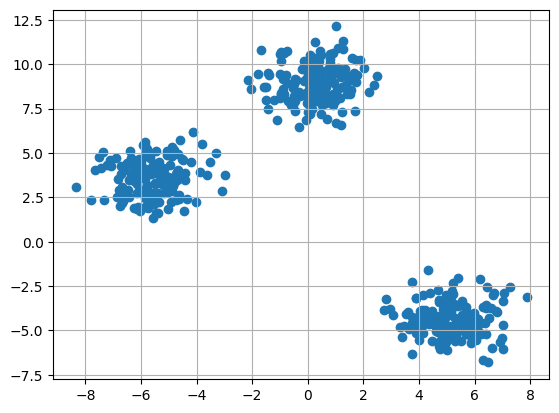

In [3]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

### Initializing Random Centroids

We will randomly initialize the centroids for K-Means clustering

- `np.random.seed(23)`: Ensures reproducibility by fixing the random seed.
- The for loop initializes k random centroids, with values between -2 and 2, for a 2D dataset.

In [4]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

### Plotting Random Initialized Center with Data Points

We will now plot the data points and the initial centroids.

- `plt.grid()`: Plots a grid.
- `plt.scatter(center[0], center[1], marker='*', c='red')`: Plots the cluster center as a red star (* marker).

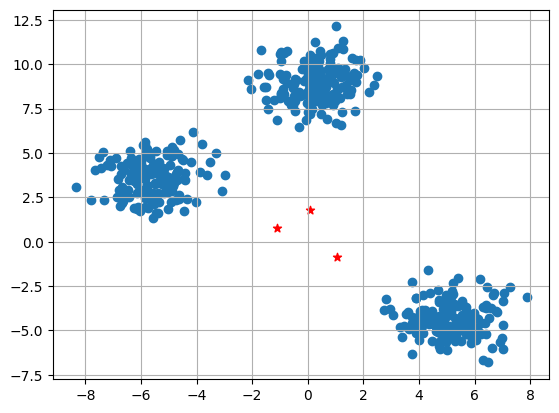

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

### Defining Euclidean Distance

To assign data points to the nearest centroid, we define a distance function:

- `np.sqrt()`: Computes the square root of a number or array element-wise.
- `np.sum()`: Sums all elements in an array or along a specified axis

In [6]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

### Creating Assign and Update Functions

Next, we define functions to assign points to the nearest centroid and update the centroids based on the average of the points assigned to each cluster.

- `dist.append(dis)`: Appends the calculated distance to the list dist.
- `curr_cluster` = `np.argmin(dist)`: Finds the index of the closest cluster by selecting the minimum distance.
- `new_center` = `points.mean(axis=0)`: Calculates the new centroid by taking the mean of the points in the cluster.

In [7]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

### Predicting the Cluster for the Data Points

We create a function to predict the cluster for each data point based on the final centroids.

- `pred.append(np.argmin(dist))`: Appends the index of the closest cluster (the one with the minimum distance) to pred.

In [8]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

### Assigning, Updating and Predicting the Cluster Centers

We assign points to clusters, update the centroids and predict the final cluster labels.

- `assign_clusters(X, clusters)`: Assigns data points to the nearest centroids.
- `update_clusters(X, clusters)`: Recalculates the centroids.
- `pred_cluster(X, clusters)`: Predicts the final clusters for all data points.

In [9]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

### Plotting Data Points with Predicted Cluster Centers

Finally, we plot the data points, colored by their predicted clusters, along with the updated centroids.

- `center` = `clusters[i]['center']`: Retrieves the center (centroid) of the current cluster.
- `plt.scatter(center[0], center[1], marker='^', c='red')`: Plots the cluster center as a red triangle (^ marker).

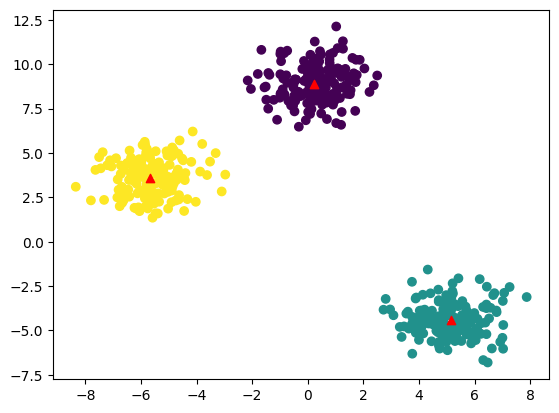

In [10]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

### Challenges with K-Means Clustering

K-Means algorithm has the following limitations:

- `Choosing the Right Number of Clusters (k)`: One of the biggest challenges is deciding how many clusters to use.
- `Sensitive to Initial Centroids`: The final clusters can vary depending on the initial random placement of centroids.
- `Non-Spherical Clusters`: K-Means assumes that the clusters are spherical and equally sized. This can be a problem when the actual clusters in the data are of different shapes or densities.
- `Outliers`: K-Means is sensitive to outliers, which can distort the centroid and, ultimately, the clusters.
